## Experimentos: comparación de protocolos puros.

Imports.

In [1]:
import src.game_builder as gb

import utils.chart as chart
import utils.metric as mu
import utils.tests as test

import matplotlib.pyplot as plt
import numpy as np
import random

Configuración de semilla.

In [2]:
RANDOM_SEED = 5764
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

### 1. Comportamiento en redes específicas.

Configuración de experimentos.

In [3]:
rounds = 500
protocols = [
    (gb.cp(), "CP"),
    (gb.mwp(), "MWP")]
small_test = test.get_specific_test_case(2, 2)
large_n_test = test.get_specific_test_case(16, 2)
large_m_test = test.get_specific_test_case(3, 16)

Generación de gráficos.

In [4]:
def plot_results(execution_metrics):
    for metric, metric_label in mu.METRICS:
        chart.series(range(1,rounds+1), [pm[metric] for pm in execution_metrics], [p[1] for p in protocols], (r"$r$", metric_label), 
                     window=50, optimal= 1 if ("poa" in metric) else None, figsize=(8,4))

Ejecución de experimentos y presentación de resultados para red chica.

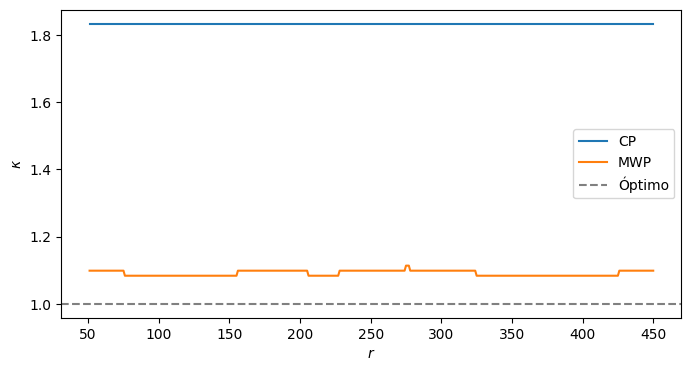

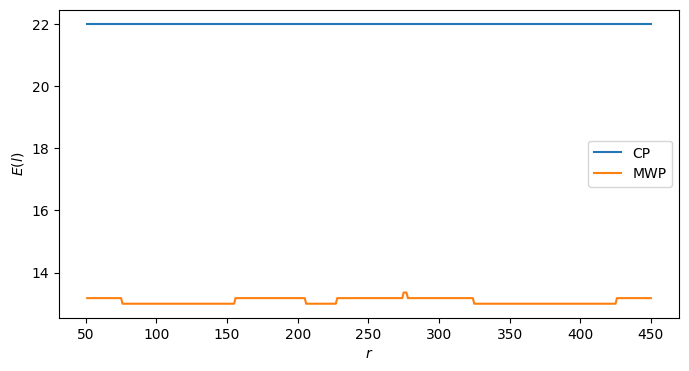

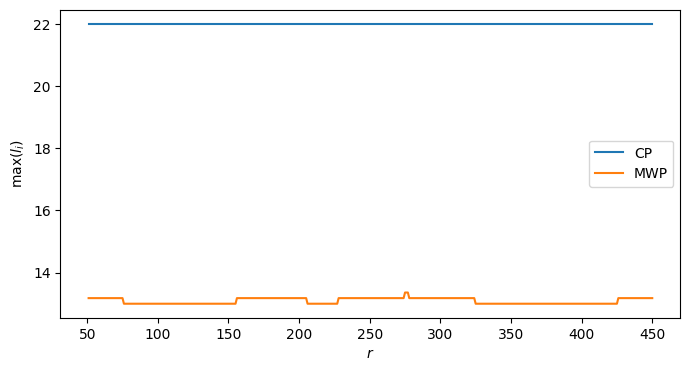

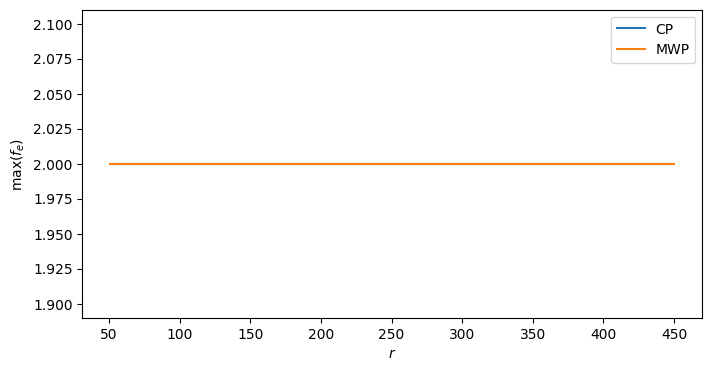

In [5]:
execution_metrics = test.execute_regular_test(rounds, small_test, [p[0] for p in protocols])
plot_results(execution_metrics)

Ejecución de experimentos y presentación de resultados para red de muchos paquetes.

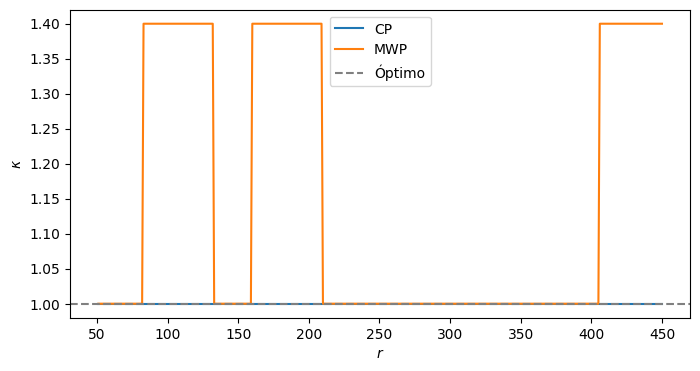

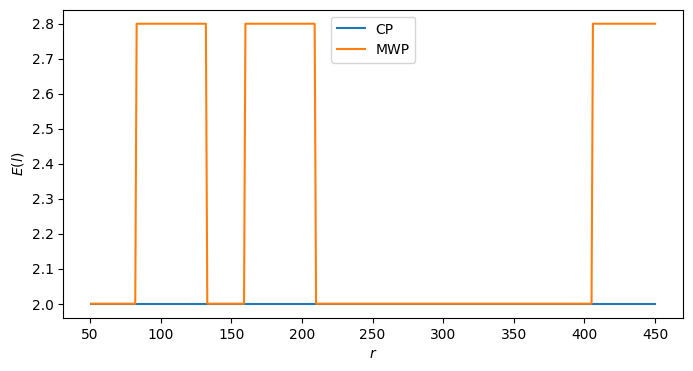

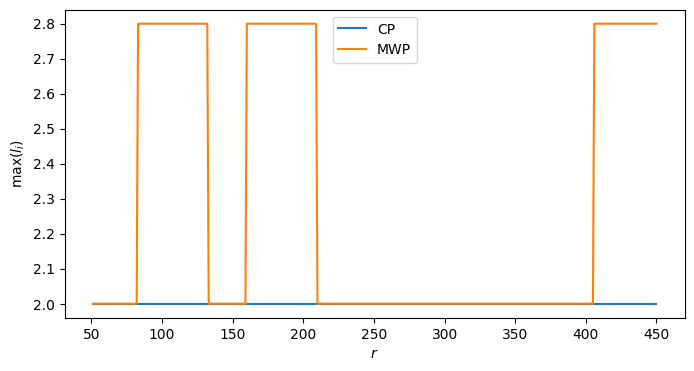

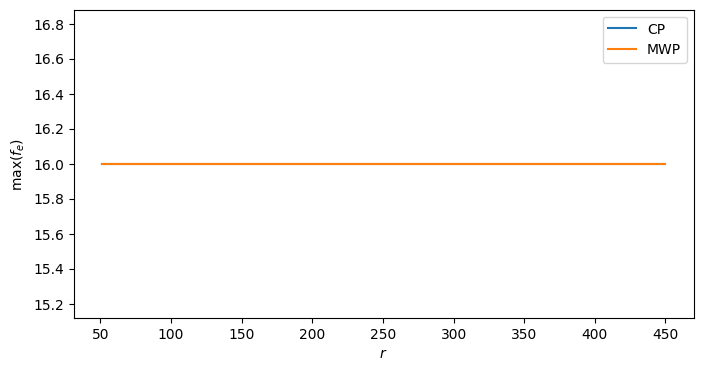

In [6]:
execution_metrics = test.execute_regular_test(rounds, large_n_test, [p[0] for p in protocols])
plot_results(execution_metrics)

Ejecución de experimentos y presentación de resultados para red de muchos caminos.

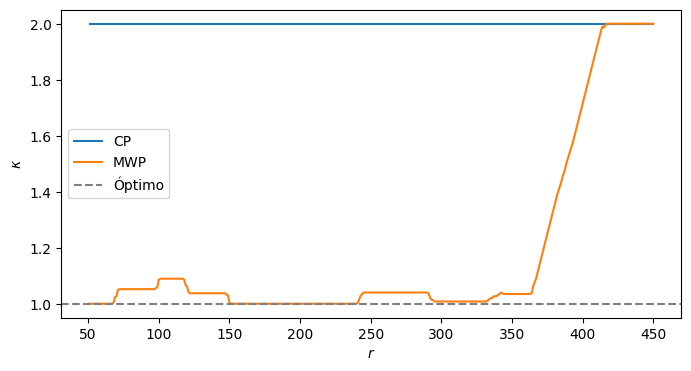

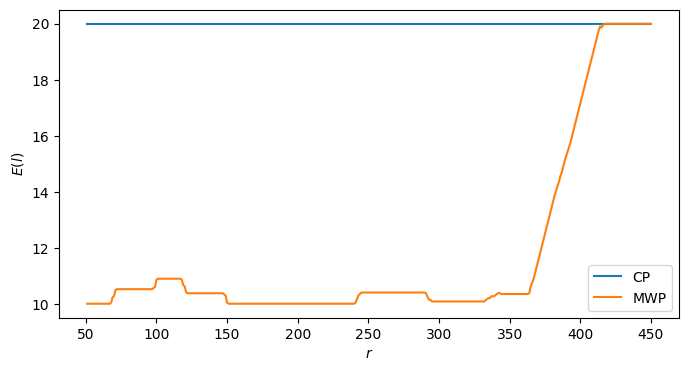

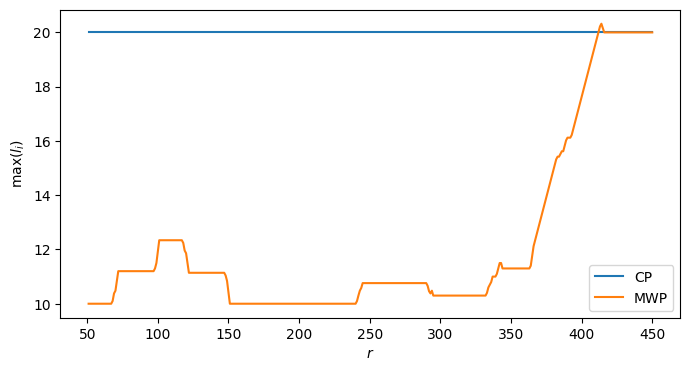

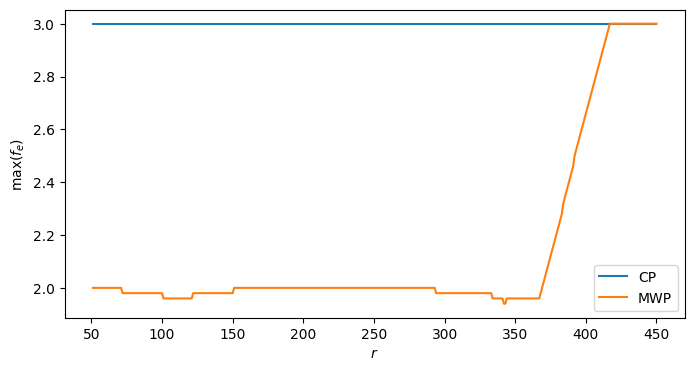

In [7]:
execution_metrics = test.execute_regular_test(rounds, large_m_test, [p[0] for p in protocols])
plot_results(execution_metrics)

### 2. Comportamiento en función del tamaño de la red o cantidad de paquetes.

Configuración de experimentos.

In [8]:
rounds = 100
test_cases = test.get_matrix_test_cases(10)

Ejecutar experimentos.

In [9]:
execution_metrics = test.execute_matrix_test(rounds, test_cases, [p[0] for p in protocols])

Presentación de resultados.

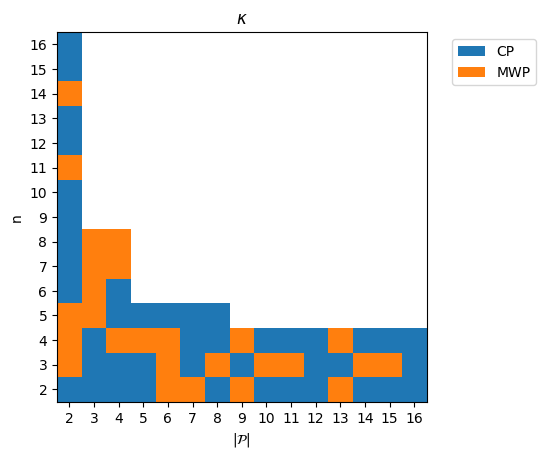

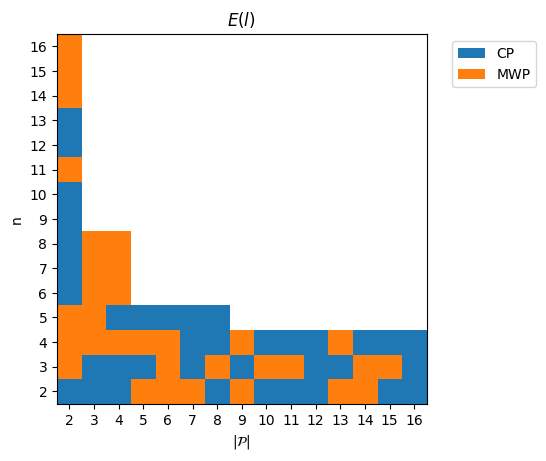

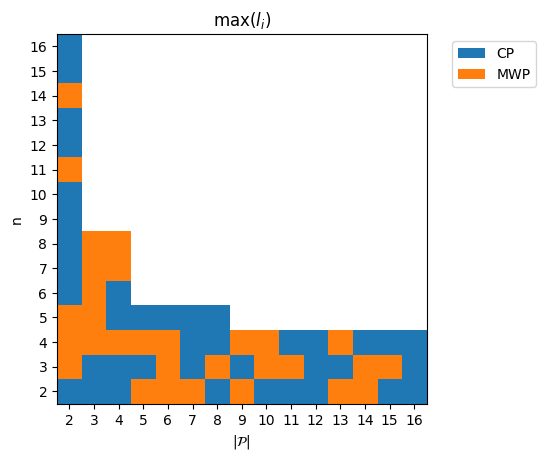

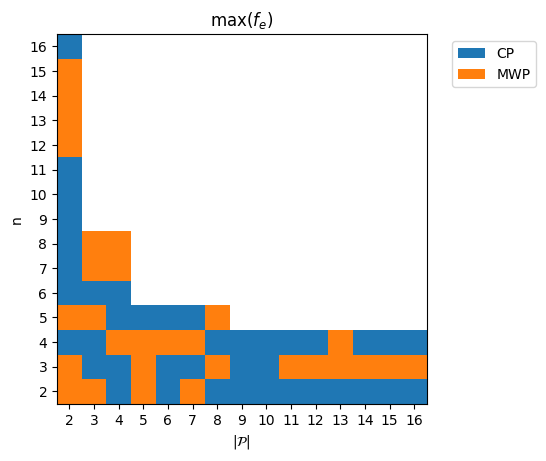

In [10]:
for metric, metric_label in mu.MEAN_METRICS:
    chart.heatmap(execution_metrics, metric, [p[1] for p in protocols], (r"$|\mathcal{P}|$", "n", metric_label))

Ejemplos para $n=2$.

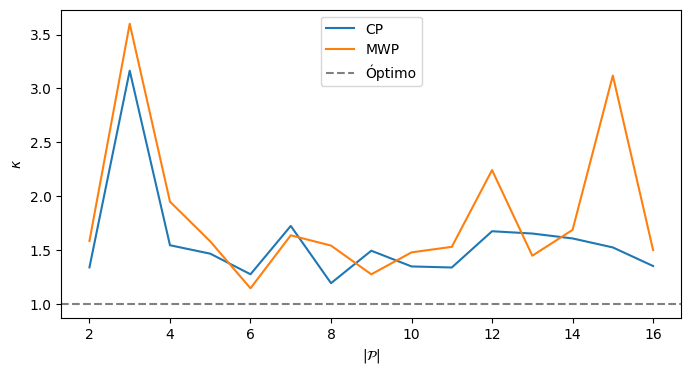

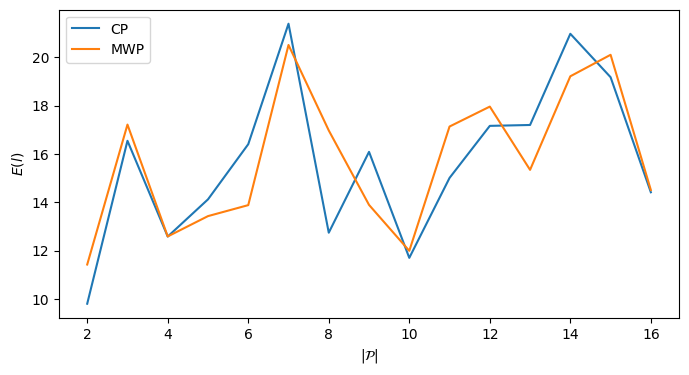

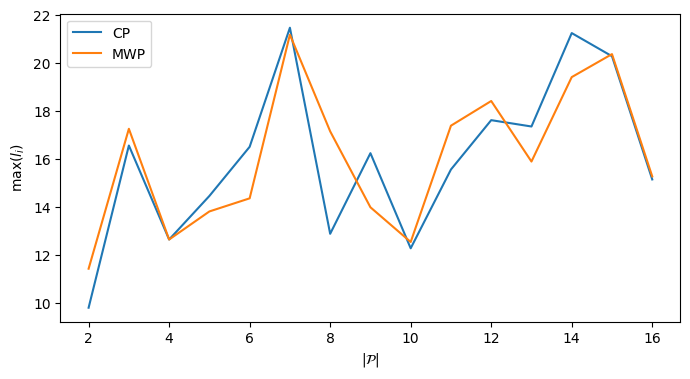

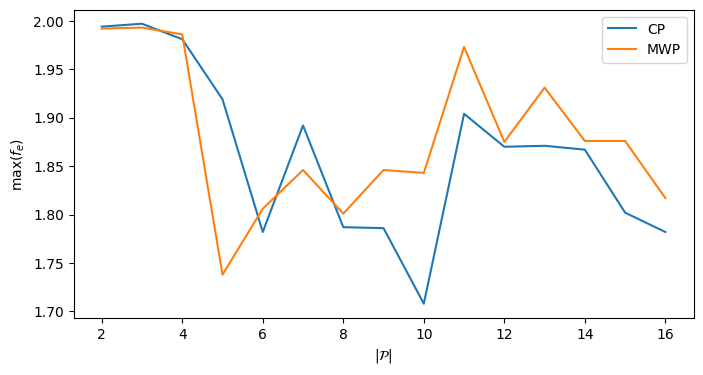

In [11]:
for metric, metric_label in mu.MEAN_METRICS:
    case_metrics = np.stack([[m[metric] for m in cell_metrics] for cell_metrics in execution_metrics[0]], axis=1)
    chart.series(range(2,len(case_metrics[0])+2), case_metrics, [p[1] for p in protocols], (r"$|\mathcal{P}|$", metric_label), 
                 window=1, optimal=1 if ("poa" in metric) else None, figsize=(8,4))

Ejemplos para $|\mathcal{P}|=2$.

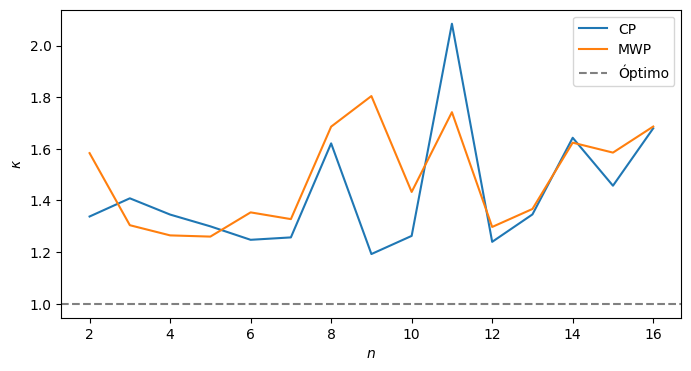

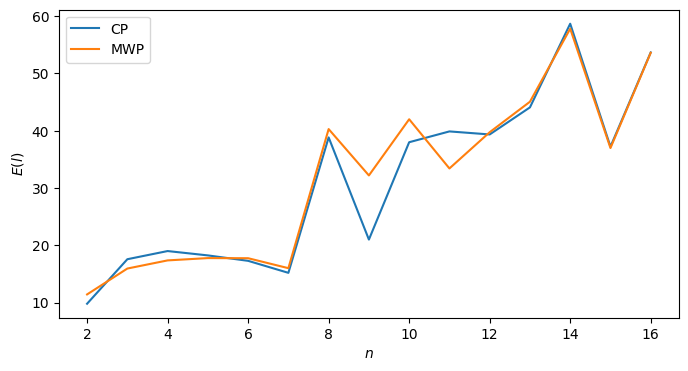

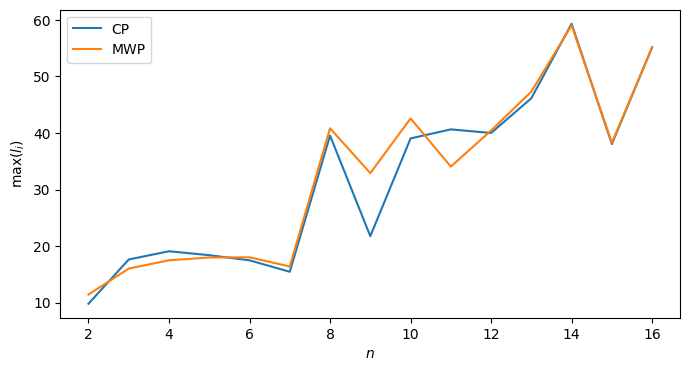

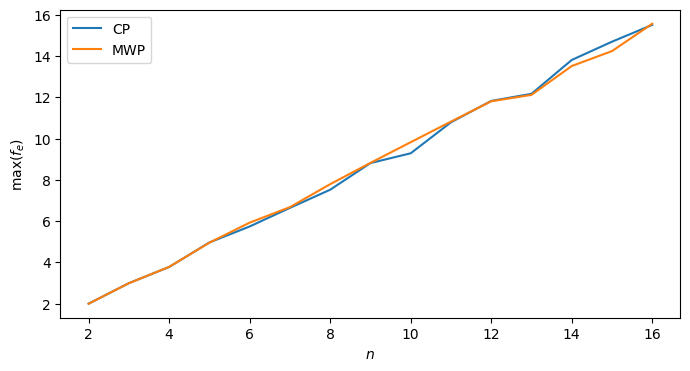

In [12]:
for metric, metric_label in mu.MEAN_METRICS:
    case_metrics = np.stack([[m[metric] for m in cell_metrics[0]] for cell_metrics in execution_metrics], axis=1)
    chart.series(range(2,len(case_metrics[0])+2), case_metrics, [p[1] for p in protocols], (r"$n$", metric_label), 
                 window=1, optimal=1 if ("poa" in metric) else None, figsize=(8,4))